## A fluid simulator for flow between tanks

Uses the `FluidSim.py` module

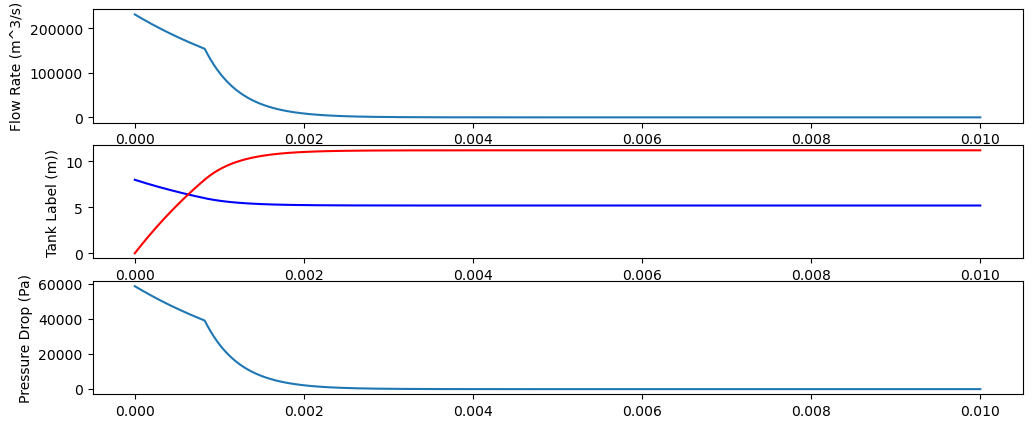

In [7]:
import FluidSim as fs
import numpy as np
import matplotlib.pyplot as plt


water = fs.Fluid(1000, 0.001)
tank1 = fs.Tank(10, 10, water, 8, 0, 2)
tank2 = fs.Tank(20, 5, water, 0, 8, 0)
pipe = fs.Pipe(100, 2, water)


## next steps
# 1 -- create a time loop
# 2 -- calculate flow rate at each time step
# 3 -- tank heights and flows rates vs time (which plotted)

# Step 1
# Initialize the variables to save the state of the simulation
tstart = 0
tend = 0.01            # seconds   (unit!) 
deltat = 0.000001         # seconds   (a very small number)
t = np.linspace(tstart, tend, int(tend/deltat))

flow1 = np.zeros(len(t))
tank1_level = np.zeros(len(t))
tank2_level = np.zeros(len(t))
pressure_drop = np.zeros(len(t))

# Step 2
# loop through time
for i in range(len(t)):

    # calculate the pressure at the outlet of tank 1
    p1 = tank1.outlet_pressure()

    # calculate the pressure at the inlet of tank 2
    p2 = tank2.inlet_pressure()

    # calculate the delta P across the pipe
    dP = p1 - p2

    # calculate the flow rate
    Q = pipe.flow_rate(dP)          # m^3/s

    # calculate the change in height for tank 1
    tank1.drain_tank(Q*deltat)

    # calculate the change in height for tank 2
    tank2.fill_tank(Q*deltat)

    # save the state
    flow1[i] = Q
    tank1_level[i] = tank1.fluid_height
    tank2_level[i] = tank2.fluid_height
    pressure_drop[i] = dP

# Step 3
# Plot the results

plt.figure(figsize=[12,5])
plt.subplot(3,1,1)
plt.plot(t, flow1)
plt.ylabel('Flow Rate (m^3/s)')

plt.subplot(3,1,2)
plt.plot(t, tank1_level, 'b')
plt.plot(t, tank2_level, 'r')
plt.ylabel('Tank Label (m))')

plt.subplot(3,1,3)
plt.plot(t, pressure_drop)
plt.ylabel('Pressure Drop (Pa)')
plt.show()




# Step 4 ... validation


What do we want to validate?

- edge cases: 
  - negative numbers? (should it error?  should the tank be underground? etc)
  - zero values?
  - pipe with no tanks?  what happens?
  - tank with no pipes?  what should happen?

- physics:
  - simple cases: two tanks and a pipe -- what is the final levels?
  - complex case: does it converge?  (does it oscillate ... it shouldn't)
  - maybe some in between

## Testing
- tests should always a True or False answer -- be specific




# Final step -- user acceptance
Does it meet the client's needs?